# Demonstration of envelope analysis and bearing tones calculation

In [91]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.signal import hilbert

In [92]:
mat_contents = scipy.io.loadmat('D:/data/work_with_Eric/Signal processing for CBM - a tutorial/demo_envelope_analysis_and_bearing_tones.mat')
bearing_specifications = mat_contents['bearing_specifications']
dcyc = mat_contents['dcyc'][0][0]
sig_cyc = np.array(mat_contents['sig_cyc'].squeeze())

bearing_specifications = [bearing_specifications['num_balls'][0][0][0][0], bearing_specifications['ball_diameter'][0][0][0][0],
                          bearing_specifications['pitch_diameter'][0][0][0][0], bearing_specifications['bearing_contact_angle'][0][0][0][0]]

In [93]:
def calc_bearing_tones(shaft_speed, number_rolling_elements, rolling_element_diameter, pitch_diameter, bearing_contact_angle):
    coeff_1 = shaft_speed / 2
    coeff_2 = (rolling_element_diameter / pitch_diameter) * np.cos(bearing_contact_angle)

    ftf = coeff_1 * (1 - coeff_2)
    bsf = (pitch_diameter / rolling_element_diameter) * coeff_1 * (1 - coeff_2**2)
    bpfo = number_rolling_elements * coeff_1 * (1 - coeff_2)
    bpfi = number_rolling_elements * coeff_1 * (1 + coeff_2)

    return ftf, bsf, bpfo, bpfi

In [94]:
# Envelope calculation using Hilbert transform
sig_env = np.abs(hilbert(sig_cyc))**2

In [95]:
# Bearing tones calculation
shaft_speed = 1  # In the cycle domain, the shaft speed is 1.
ftf, bsf, bpfo, bpfi = calc_bearing_tones(shaft_speed, bearing_specifications[0],
                                          bearing_specifications[1],
                                          bearing_specifications[2],
                                          bearing_specifications[3])
bearing_tones = [ftf, bsf, bpfo, bpfi]

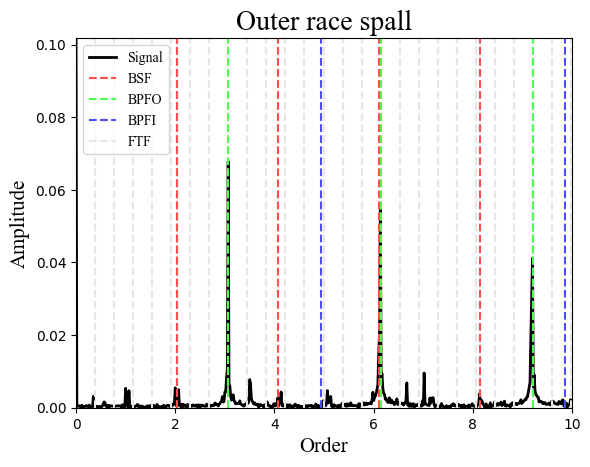

In [96]:
# Part for figures
sig_env_order = np.abs(np.fft.fft(sig_env))  # Envelope in the order domain
sig_len = len(sig_cyc)  # Length of the signal
cyc = np.arange(0, sig_len * dcyc, dcyc)  # Cycle vector
dorder = 1 / (sig_len * dcyc)  # Order resolution
order = np.arange(0, (sig_len-0.5) * dorder, dorder)  # Order vector

axis_font_size = 10
title_font_size = 20
axis_name_font_size = 15
lgnd_font_size = 10

num_harmonics = 30
ftf_harmonics = np.arange(ftf, num_harmonics * ftf, ftf)
bsf_harmonics = np.arange(bsf, num_harmonics * bsf, bsf)
bpfo_harmonics = np.arange(bpfo, num_harmonics * bpfo, bpfo)
bpfi_harmonics = np.arange(bpfi, num_harmonics * bpfi, bpfi)

plt.figure()
plt.ylim([0, 1.5 * max(sig_env_order[1:int(10 / dorder)] / len(sig_env_order))])
plt.xlim([0, 10])
plt.xlabel('Order', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.ylabel('Amplitude', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.title('Outer race spall', fontname='Times New Roman', fontsize=title_font_size)
#plt.legend([plt_info[0], plt_info[30], plt_info[60], plt_info[90]], ['FTF', 'BSF', 'BPFO', 'BPFI', 'Signal'],
         #  loc='upper left', prop={'size': lgnd_font_size, 'family': 'Times New Roman'})

plt.plot(order, sig_env_order / len(sig_env_order), linewidth=2, color='black')

# Add dashed lines at FTF and its harmonics
#for i in range(len(ftf_harmonics)):

plt.axvline(bsf_harmonics[0], linestyle='--', color=[1, 0.3, 0.3], linewidth=1.5)
plt.axvline(bpfo_harmonics[1], linestyle='--', color=[0.3, 1, 0.3], linewidth=1.5)
plt.axvline(bpfo_harmonics[2], linestyle='--', color=[0.3, 0.3, 1], linewidth=1.5)
plt.axvline(bpfo_harmonics[3], linestyle='--', color=[0.9, 0.9, 0.9], linewidth=1.5)
for harmonic in ftf_harmonics:
    plt.axvline(harmonic, linestyle='--', color=[0.9, 0.9, 0.9], linewidth=1.5)
for harmonic in bsf_harmonics:
    plt.axvline(harmonic, linestyle='--', color=[1, 0.3, 0.3], linewidth=1.5)
for harmonic in bpfo_harmonics:
    plt.axvline(harmonic, linestyle='--', color=[0.3, 1, 0.3], linewidth=1.5)
for harmonic in bpfi_harmonics:
    plt.axvline(harmonic, linestyle='--', color=[0.3, 0.3, 1], linewidth=1.5)
    
legend_labels = ['Signal', 'BSF', 'BPFO', 'BPFI', 'FTF']
plt.legend(legend_labels, loc='upper left', prop={'size': lgnd_font_size, 'family': 'Times New Roman'})

plt.show()